### Linear Regression Assignment
Build the linear regression model using scikit learn in boston data to predict 
'Price' based on other dependent variable. 

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

import sklearn.metrics as metrics
from sklearn.metrics  import mean_absolute_error, mean_squared_error, r2_score
 
import warnings
warnings.filterwarnings("ignore")

In [2]:
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [3]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
## In the above dataset, columns are given the range from 0 to 12 and we are not able to understand the features 
# So, lets assign fature names from the original Boston Dataset
bos.columns = boston.feature_names
bos.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# Also, we can see that Price column is missing, so let's add our Price column as well
bos['PRICE'] = boston.target

In [6]:
bos.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
start = "\033[1m"
end = "\033[0;0m"

print(start + "Shape of the data is: " + end, bos.shape )
print("*************************************************\n")

print(start+ "Data type of the columns :\n " +end, bos.dtypes)
print("*************************************************\n")


print(start+" Unique values in the data :\n " + end, bos.nunique())
print("*************************************************\n")
 

print(start+"Check for missing values :\n" + end, bos.isnull().sum())
print("*************************************************\n")


Shape of the data is:  (506, 14)
*************************************************

Data type of the columns :
  CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object
*************************************************

 Unique values in the data :
  CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64
*************************************************

Check for missing values :
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64
****************************

##### Few Observations from above code-
1. There are 504 rows and 14 columns in this boston dataset
2. All the columns have the same data type, which is float64
3. There are no mising values in this dataset.

####  Let's dive into Exploratory Data Analysis 

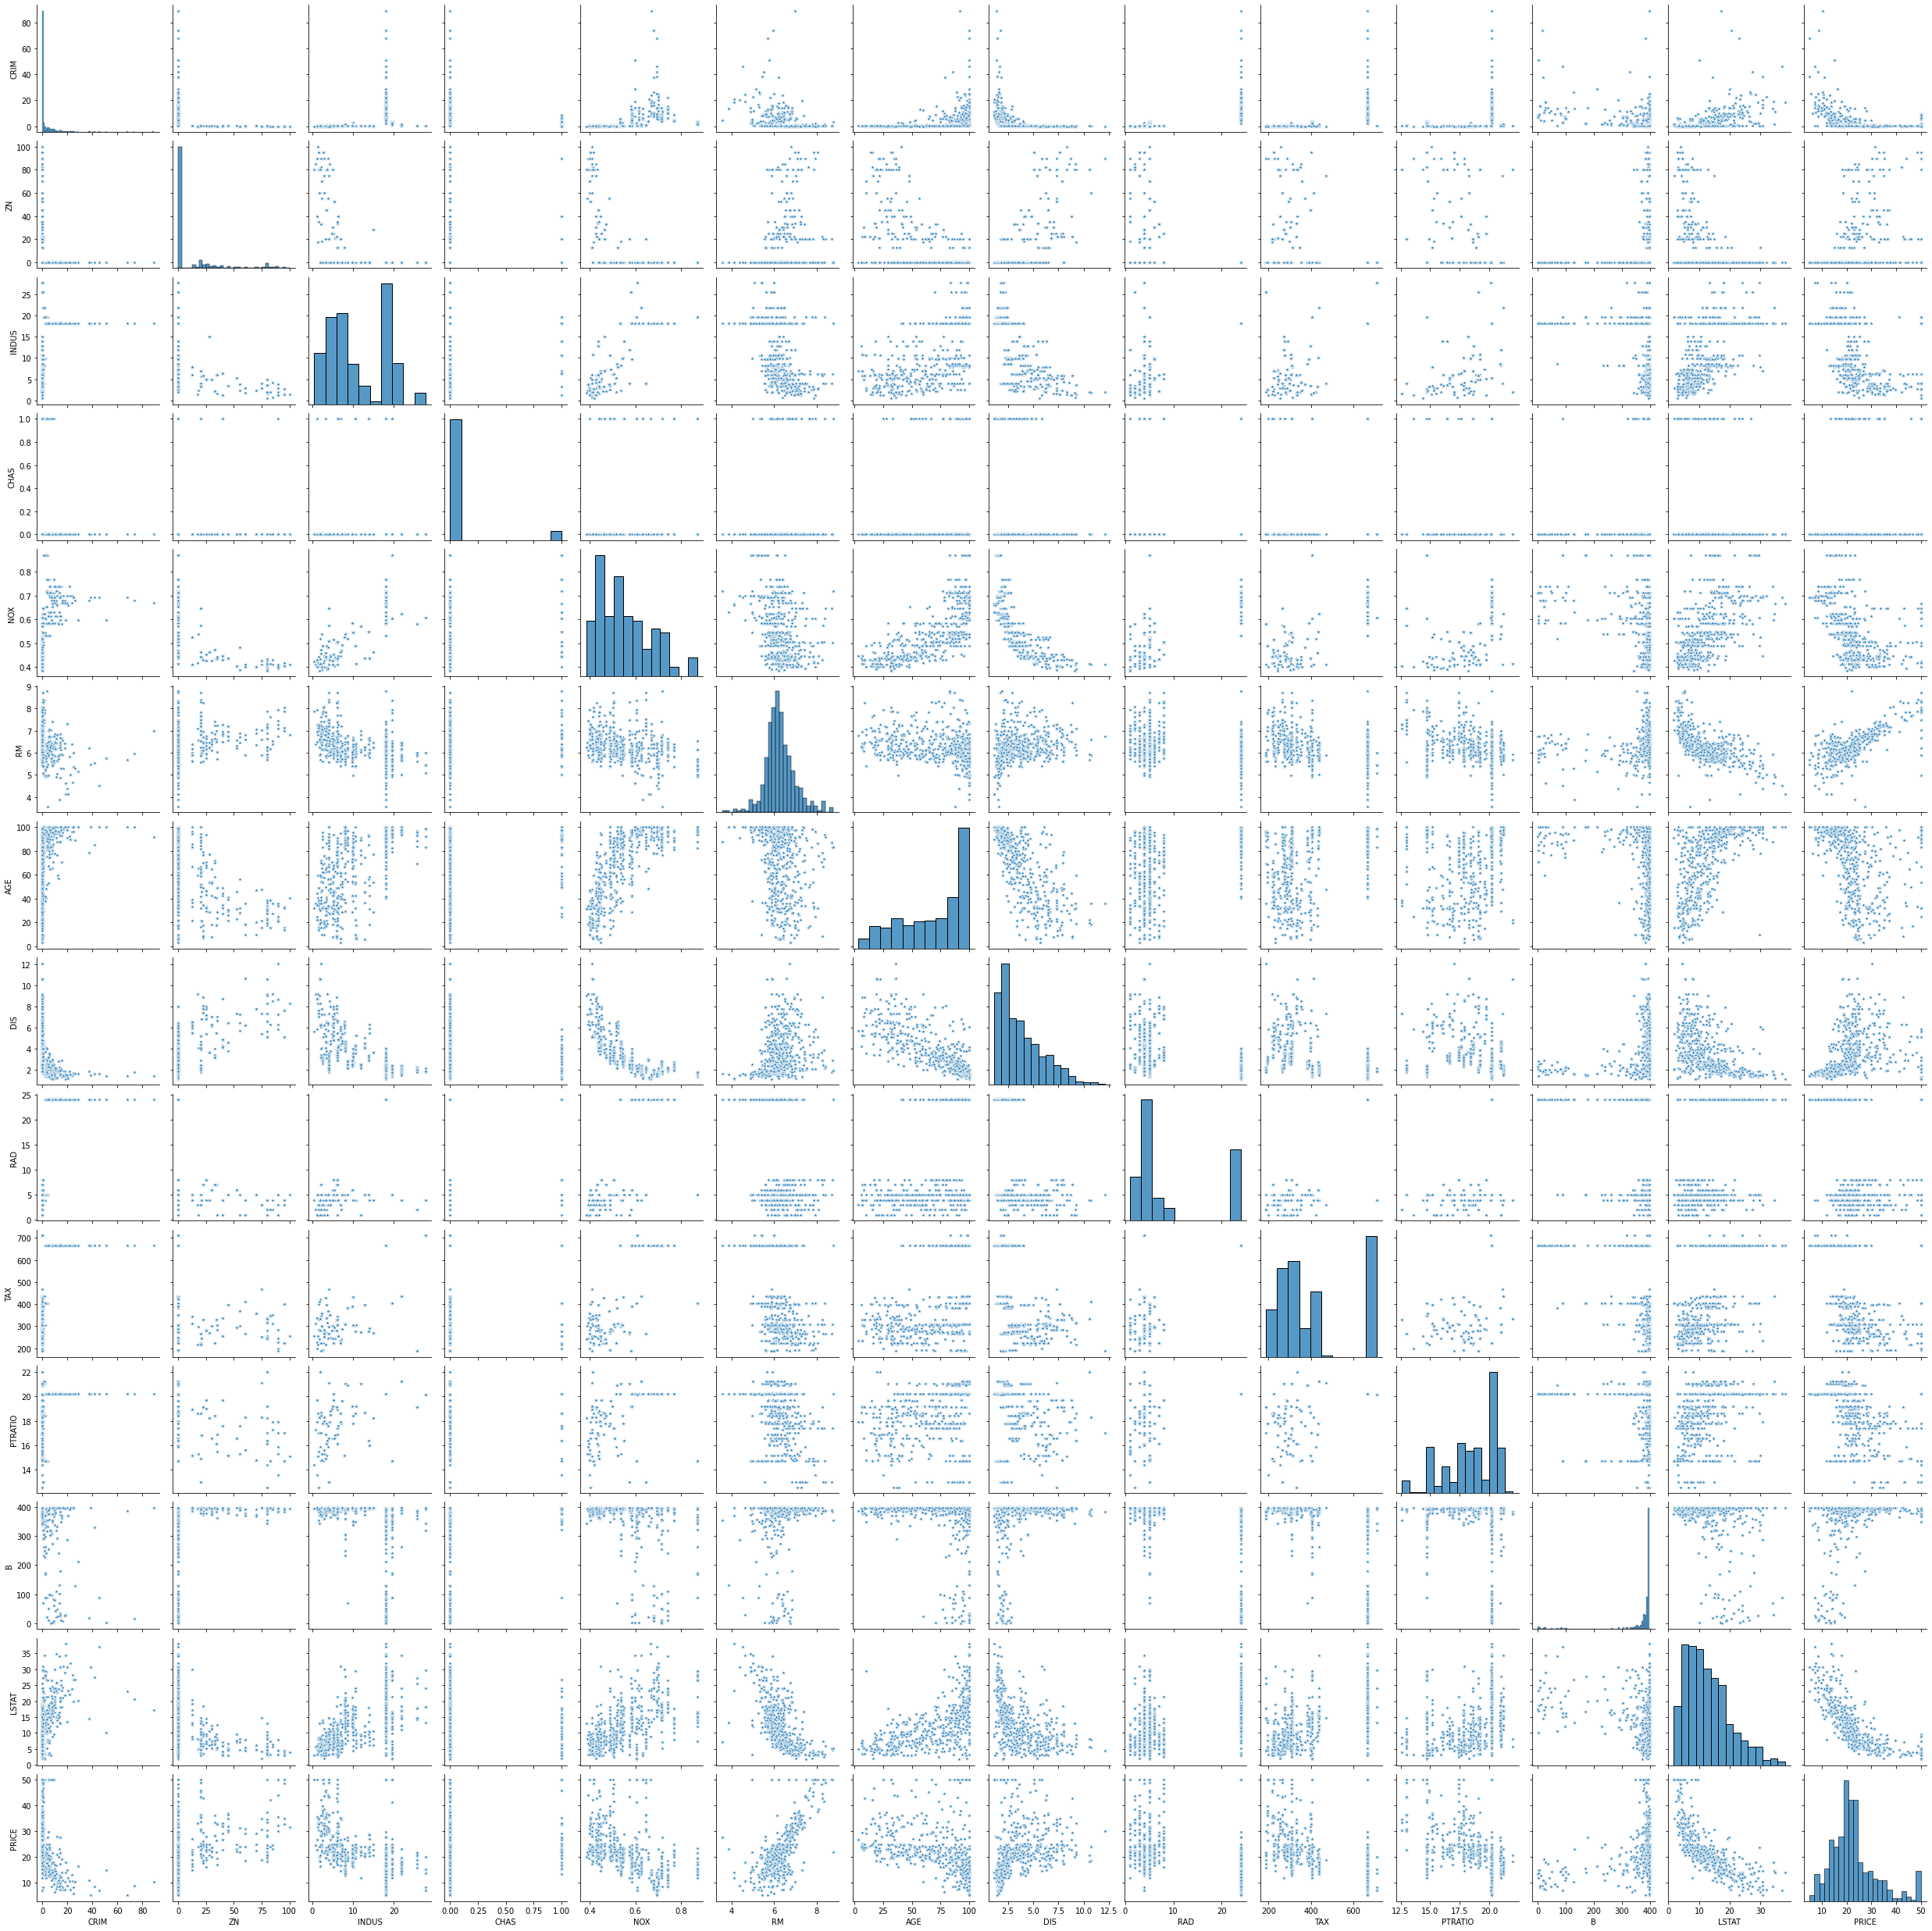

In [8]:
sns.pairplot(bos,kind = 'scatter',markers="*",palette='viridis')
plt.show()

Freuency of number of rooms:
6    312
7    125
5     37
8     24
4      5
9      3
Name: RM, dtype: int64


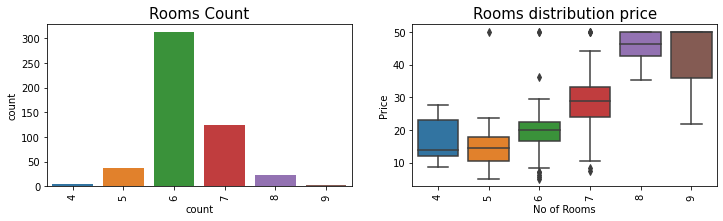

In [9]:
bos["RM"] = bos['RM'].round(0).astype(int)

print("Freuency of number of rooms:")
print(bos["RM"].value_counts())

plt.figure(figsize = (12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

ax1 = plt.subplot(221)
ax1 = sns.countplot(x="RM", data=bos,
                    ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.set_title("Rooms Count", fontsize=15)
ax1.set_xlabel("No.of rooms")
ax1.set_xlabel("count")

ax2 = plt.subplot(222)
ax2 = sns.boxplot(x="RM", y='PRICE',
                  data=bos, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax2.set_title("Rooms distribution price", fontsize=15)
ax2.set_xlabel("No of Rooms")
ax2.set_ylabel("Price")

 

plt.show()



<AxesSubplot:xlabel='PRICE', ylabel='Density'>

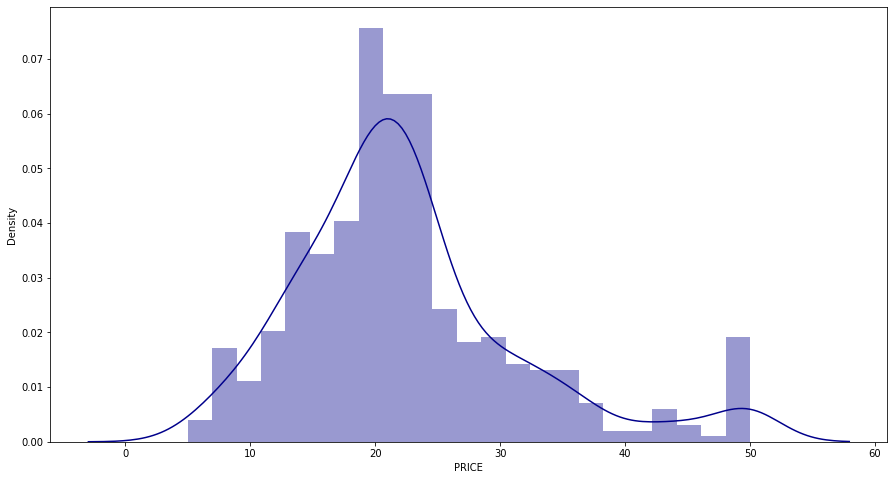

In [10]:
plt.figure(figsize=(15,8))
sns.distplot(bos['PRICE'],color='darkblue')

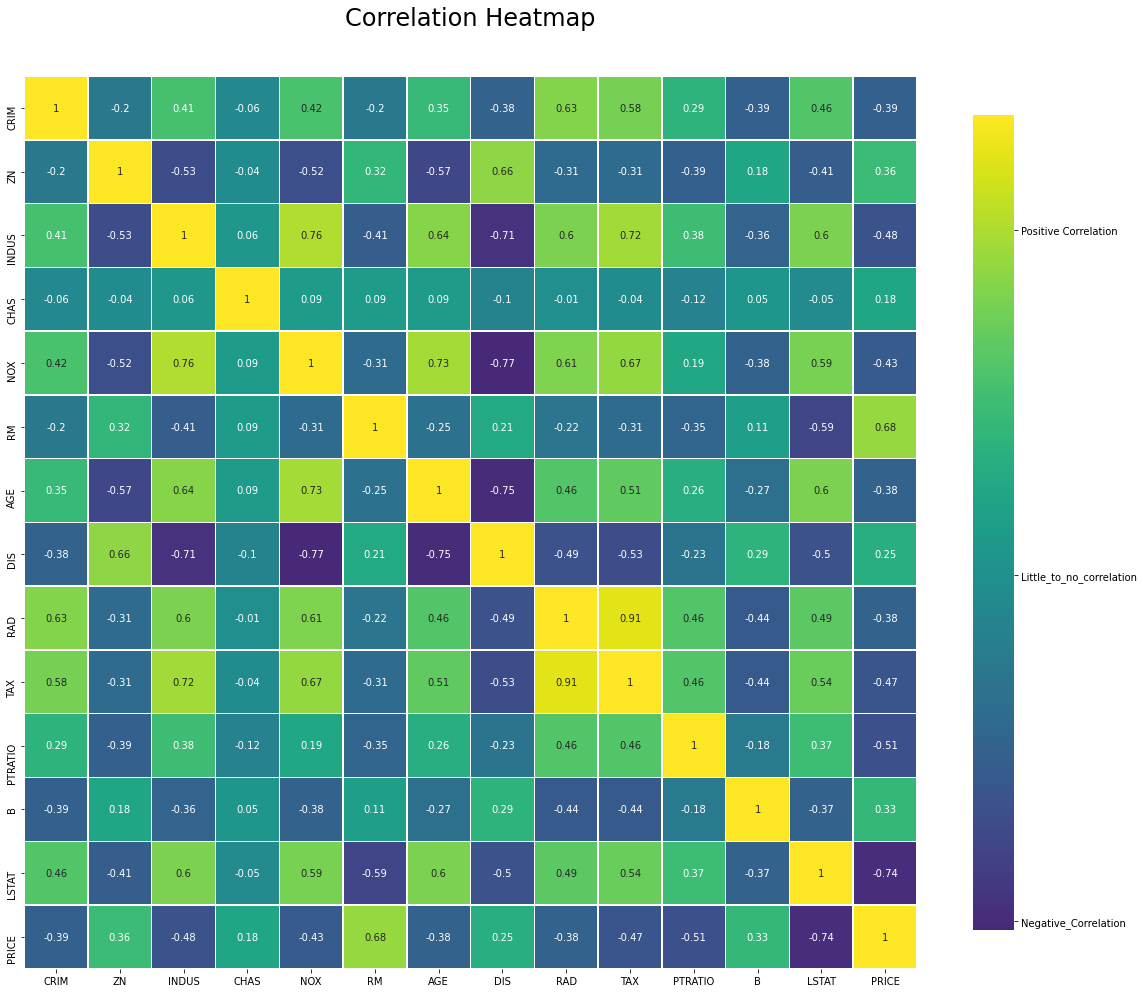

In [11]:
mask = np.triu(np.ones_like(bos.corr()))
f,ax = plt.subplots(figsize=(20,20))
cmap= sns.color_palette("viridis",as_cmap=True)
sns.heatmap(bos.corr().round(2),annot=True,cmap=cmap,vmax=1.0,center=0,square=True,lw=0.5,cbar_kws={"shrink":0.75})
ax.set_title('Correlation Heatmap', fontsize=24, y=1.05)
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([-0.75,0,0.75])
colorbar.set_ticklabels(['Negative_Correlation','Little_to_no_correlation','Positive Correlation'])

##### Few observations from the above Heatmap - 

1. Room No. has a high positive correlation with Price, i.e Mean Price is 0.7
The more the value of no. of rooms, the more will be the value of 'Mean_Price'. 
Because it's pretty evident that with increase in the number of rooms, the price of the house will increase.

2. Pupil Teacher ratio has negative mean value i.e.-0.51. As Pupil Teacher ratio increases, the price of the house will decrease.

3. NOX and Distance are highly correlated, So there exists multicollinearity. 

4. CHAS feature has very less mean value, so if we include that in our feature selection,it will not give us much information to predict the price of the House. we have to drop one of these columns to increase the accuracy of the model.(This will automatically reduce the complexity as well)

5. LSTAT(-0.74), Tax(-0.47) and Rad(-0.38) has negative correlation with the price

6. AGE and DIS are negatively correlated with each other

7. TAX and RAD are positively correlated with each other  This means, with significant increase in TAx, Radial highways will also increase.


### Let's check outliers in Price and LSTAT columns

<AxesSubplot:>

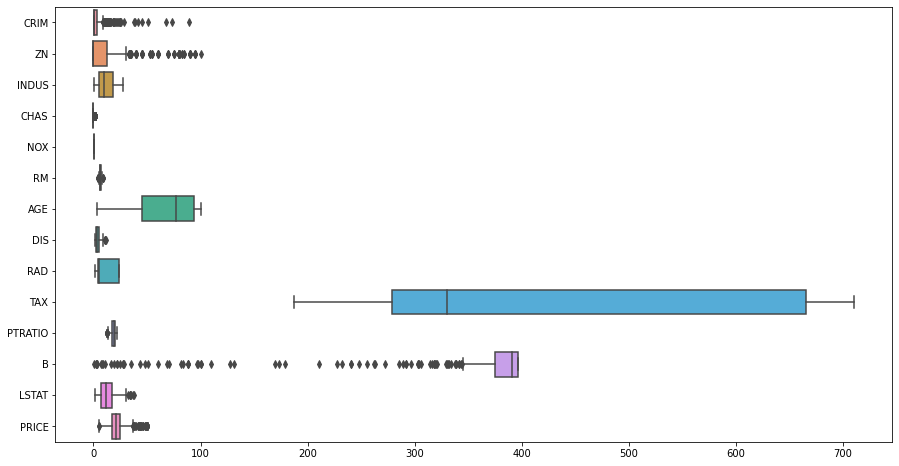

In [12]:
plt.figure(figsize=(15,8))
sns.boxplot(data=bos,orient='h')

In [13]:
q1_price = bos['PRICE'].quantile(0.25)
q3_price = bos['PRICE'].quantile(0.75)

iqr_price = q3_price - q1_price

UL_price = q3_price + (1.5 * iqr_price)
LL_price = q1_price - (1.5 * iqr_price)

print(iqr_price)
print(UL_price)
print(LL_price)


7.975000000000001
36.962500000000006
5.0624999999999964


In [14]:
bos[bos['PRICE'] > UL_price]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
97,0.12083,0.0,2.89,0.0,0.4450,8,76.0,3.4952,2.0,276.0,18.0,396.90,4.21,38.7
98,0.08187,0.0,2.89,0.0,0.4450,8,36.9,3.4952,2.0,276.0,18.0,393.53,3.57,43.8
157,1.22358,0.0,19.58,0.0,0.6050,7,97.4,1.8773,5.0,403.0,14.7,363.43,4.59,41.3
161,1.46336,0.0,19.58,0.0,0.6050,7,90.8,1.9709,5.0,403.0,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1.0,0.6050,8,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1.0,0.6050,8,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0.0,0.6050,8,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0
179,0.05780,0.0,2.46,0.0,0.4880,7,58.4,2.8290,3.0,193.0,17.8,396.90,5.04,37.2
180,0.06588,0.0,2.46,0.0,0.4880,8,83.3,2.7410,3.0,193.0,17.8,395.56,7.56,39.8
182,0.09103,0.0,2.46,0.0,0.4880,7,92.2,2.7006,3.0,193.0,17.8,394.12,4.82,37.9


In [15]:
print('Count of Selling Price greater than Upper limit : ',bos[bos['PRICE']> UL_price].count()['PRICE'])

Count of Selling Price greater than Upper limit :  38


In [16]:
new_bos = bos[bos['PRICE'] < UL_price]

<AxesSubplot:xlabel='PRICE'>

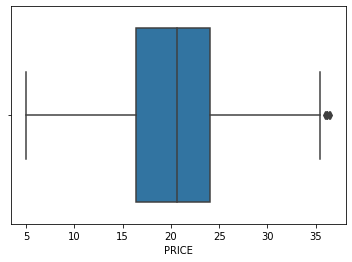

In [17]:
sns.boxplot(x=new_bos['PRICE'])

In [18]:
q1_LSTAT = bos['LSTAT'].quantile(0.25)
q3_LSTAT= bos['LSTAT'].quantile(0.75)

iqr_LSTAT = q3_LSTAT - q1_LSTAT

UL_LSTAT = q3_LSTAT + (1.5 * iqr_LSTAT)
LL_LSTAT = q1_LSTAT - (1.5 * iqr_LSTAT)

print(iqr_LSTAT)
print(UL_LSTAT)
print(LL_LSTAT)


10.005000000000003
31.962500000000006
-8.057500000000005


In [19]:
bos[bos['LSTAT'] > UL_LSTAT] 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
141,1.62864,0.0,21.89,0.0,0.624,5,100.0,1.4394,4.0,437.0,21.2,396.90,34.41,14.4
373,11.10810,0.0,18.10,0.0,0.668,5,100.0,1.1742,24.0,666.0,20.2,396.90,34.77,13.8
374,18.49820,0.0,18.10,0.0,0.668,4,100.0,1.1370,24.0,666.0,20.2,396.90,37.97,13.8
387,22.59710,0.0,18.10,0.0,0.700,5,89.5,1.5184,24.0,666.0,20.2,396.90,31.99,7.4
412,18.81100,0.0,18.10,0.0,0.597,5,100.0,1.5539,24.0,666.0,20.2,28.79,34.37,17.9
414,45.74610,0.0,18.10,0.0,0.693,5,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,7.0
438,13.67810,0.0,18.10,0.0,0.740,6,87.9,1.8206,24.0,666.0,20.2,68.95,34.02,8.4


In [20]:
print('Count of Selling Price greater than Upper limit : ',bos[bos['LSTAT']> UL_LSTAT].count()['LSTAT'] )

Count of Selling Price greater than Upper limit :  7


In [21]:
new_bos = bos[bos['LSTAT'] < UL_LSTAT] 

<AxesSubplot:xlabel='LSTAT'>

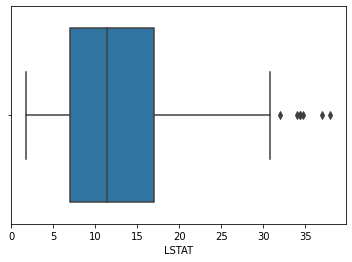

In [22]:
sns.boxplot(x=bos['LSTAT'])  ## Box plot before handling outlies

<AxesSubplot:xlabel='LSTAT'>

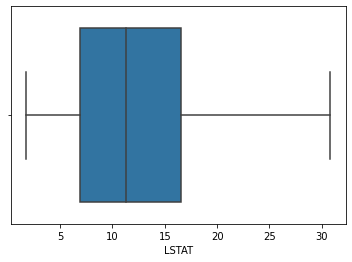

In [23]:
sns.boxplot(x=new_bos['LSTAT'])  ## BOx Plot after handling outliers

#### So, we have have handled outliers quite a  bit.


#### We will examine the independent features and check how it affects the dependent feature.

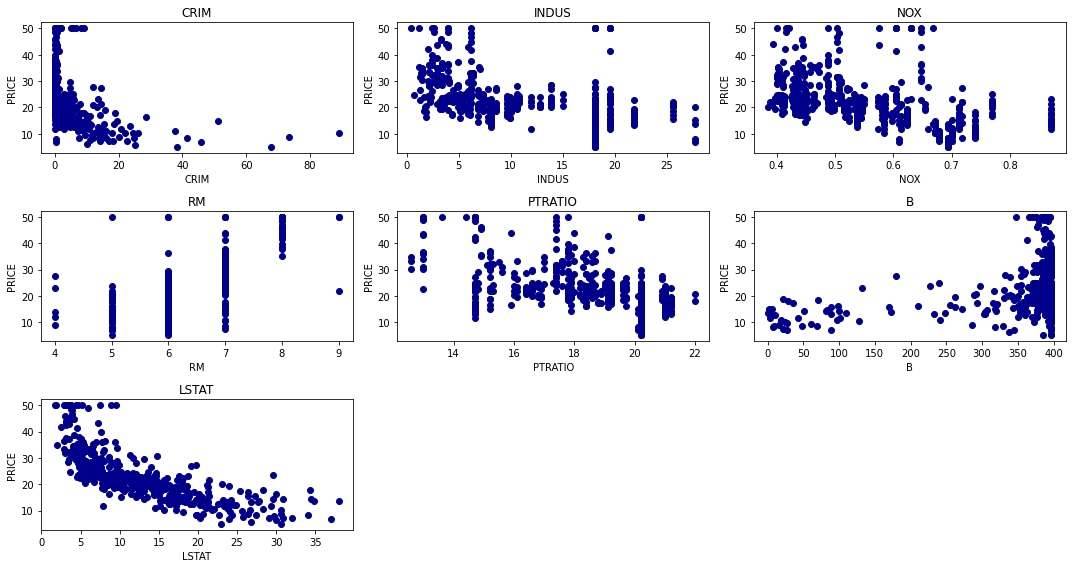

In [24]:
plt.figure(figsize=(15,8))
features = ['CRIM','INDUS','NOX','RM','PTRATIO','B','LSTAT']
target = bos['PRICE']
for i,col in enumerate(features):
    plt.subplot(3,len(features)/2,i+1)
    x=bos[col]
    y=target
    plt.scatter(x,y,marker='o',color='darkblue')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('PRICE')           

    plt.tight_layout()    

#### From the above scatterplot, there is a clear linear relationship between PRICE and RM (positive) and PRICE and LSTAT (negative)

If we look at the plot of Price Vs RM, there is a significant linear relation.Also LSTAT and PTRAIO has negative correlation with the PRICE

Shape of X train: (349, 3)
Shape of Y Train: (150, 3)
-------------------------------
             0     1
0    13.759607  19.1
1    24.321245  23.4
2    37.068850  41.7
3    24.942329  23.2
4    27.563478  23.7
..         ...   ...
145  33.642329  29.1
146  26.414746  28.7
147  22.477566  21.2
148  23.663709  19.3
149  23.318643  23.1

[150 rows x 2 columns]
-------------------------------
Mean_Absolute_Error :  3.1837528205103136
Mean_Squared_Error :  21.137225562588636
Root_Mean_Squared_Error :  4.597523851225639
R2 score is :  0.699696678043713
-------------------------------


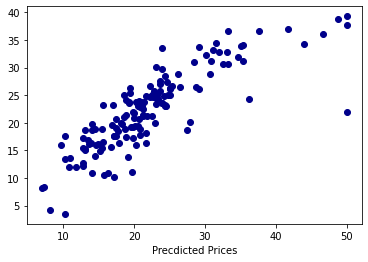

<AxesSubplot:xlabel='PRICE', ylabel='Density'>

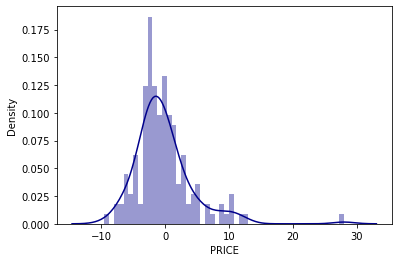

In [25]:
 ### Let's consider only 3 columns
    
X = new_bos[['RM','PTRATIO','LSTAT']]
y = new_bos['PRICE']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Let's split the data
    
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.3,random_state = 42)

print("Shape of X train:",X_train.shape)
print("Shape of Y Train:", X_test.shape)
print("-------------------------------")

lm = LinearRegression()
lm.fit(X_train,y_train)

y_pred = lm.predict(X_test)

df = pd.DataFrame(data = [y_pred,y_test])
print(df.T)

print("-------------------------------")
print('Mean_Absolute_Error : ' , metrics.mean_absolute_error(y_test,y_pred))
print('Mean_Squared_Error : ' , metrics.mean_squared_error(y_test,y_pred))
print('Root_Mean_Squared_Error : ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 score is : ', r2_score(y_test,y_pred))
print("-------------------------------")
    
## Let's plot the scaterplot of Precicted and Actual values
plt.scatter(y_test,y_pred,color= 'darkblue')
plt.xlabel("Actual Prices")
plt.xlabel("Precdicted Prices")
plt.show()
    
sns.distplot((y_test-y_pred),bins=50,color= 'darkblue')
 

#### This graph looks quite normally distributed.

- Though our score is not bad, however there are few things to be considered in applying Linear Regression on Boston House Price Prediction.
- We can try implementing different algorithms and check if we can increase the accuracy .

Variance score: 0.699696678043713


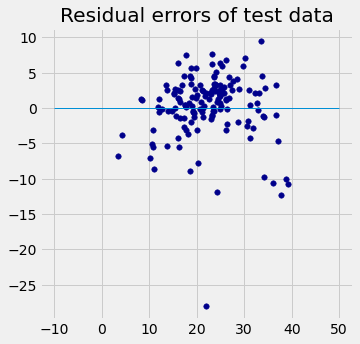

In [26]:
    ## Let's create a residual function and plot the graph
def residuals():
        
        plt.style.use('fivethirtyeight')
        plt.figure(figsize=(5,5))
    
        lm = LinearRegression()
        lm.fit(X_train,y_train)
        y_pred = lm.predict(X_test)
    
        plt.scatter(lm.predict(X_test),lm.predict(X_test)- y_test,s=30,color='darkblue')
        plt.xlabel('')
        plt.title("Residual errors of test data")
        plt.hlines(0,xmin=-10,xmax=50,lw=1)
       
    # The closer to 1,accurate is the prediction

        print("Variance score: {}".format(lm.score(X_test,y_test)))
        

residuals()

In [27]:
y_pred_data = pd.DataFrame({'Actual Prices':y_test,'Predicted Prices':y_pred,'Difference':y_test-y_pred})
y_pred_data[0:30]

,Actual Prices,Predicted Prices,Difference
467,19.1,13.759607,5.340393
73,23.4,24.321245,-0.921245
232,41.7,37.068850,4.631150
176,23.2,24.942329,-1.742329
238,23.7,27.563478,-3.863478
431,14.1,18.664031,-4.564031
156,13.1,18.729017,-5.629017
55,35.4,31.203262,4.196738
323,18.5,21.013643,-2.513643
9,18.9,21.358207,-2.458207


#### Let's create log function of PTRATIO and LSTAT  and check if accuracy increases or not

Shape of X train: (349, 3)
Shape of Y Train: (150, 3)
-------------------------------
             0     1
0    13.717916  19.1
1    24.669307  23.4
2    42.315552  41.7
3    23.686987  23.2
4    28.271815  23.7
..         ...   ...
145  35.435011  29.1
146  28.673738  28.7
147  21.038312  21.2
148  22.595263  19.3
149  24.834628  23.1

[150 rows x 2 columns]
-------------------------------
Mean_Absolute_Error :  3.146405718831438
Mean_Squared_Error :  20.75072294237147
Root_Mean_Squared_Error :  4.555296142115402
R2 score is :  0.7051878443489757
-------------------------------


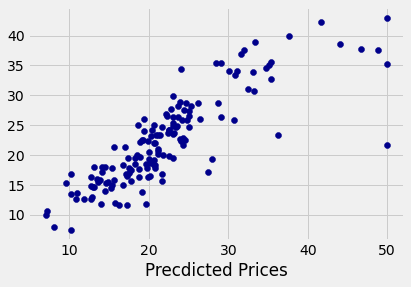

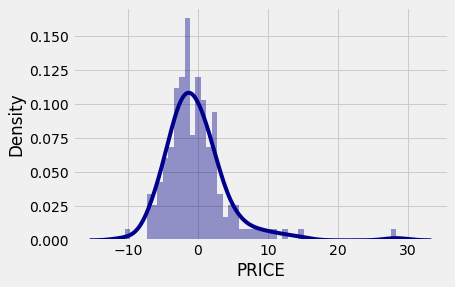

In [28]:
def model2():

    ###  We will convert columns PTRATIO and LSTAT 
    new_bos['PTRATIO'] = new_bos['PTRATIO'].apply(np.log)
    new_bos['LSTAT'] = new_bos['LSTAT'].apply(np.log)
    
    X = new_bos[['RM','PTRATIO','LSTAT']]
    y = new_bos['PRICE']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Let's split the data
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.3,random_state = 42)


    print("Shape of X train:",X_train.shape)
    print("Shape of Y Train:", X_test.shape)
    print("-------------------------------")

    lm = LinearRegression()
    lm.fit(X_train,y_train)

    y_pred = lm.predict(X_test)

    df = pd.DataFrame(data = [y_pred,y_test])
    print(df.T)

    print("-------------------------------")
    print('Mean_Absolute_Error : ' , metrics.mean_absolute_error(y_test,y_pred))
    print('Mean_Squared_Error : ' , metrics.mean_squared_error(y_test,y_pred))
    print('Root_Mean_Squared_Error : ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    print('R2 score is : ', r2_score(y_test,y_pred))
    print("-------------------------------")
    
    ## Let's plot the scaterplot of Precicted and Actual values
    plt.scatter(y_test,y_pred,color= 'darkblue')
    plt.xlabel("Actual Prices")
    plt.xlabel("Precdicted Prices")
    plt.show()
    
    sns.distplot((y_test-y_pred),bins=50,color= 'darkblue')
    
model2()

Variance score: 0.699696678043713


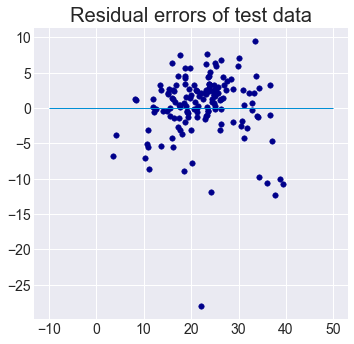

In [29]:
## Let's create a residual function and plot the graph
def residuals2():
    plt.style.use("seaborn-darkgrid")
    plt.figure(figsize=(5,5))
    plt.scatter(lm.predict(X_test),lm.predict(X_test)- y_test,s=30,color='darkblue')
    plt.xlabel('')
    plt.title("Residual errors of test data")
    plt.hlines(0,xmin=-10,xmax=50,lw=1)
       
# The closer to 1,accurate is the prediction

print("Variance score: {}".format(lm.score(X_test,y_test)))

residuals2()

Shape of X train: (349, 3)
Shape of Y Train: (150, 3)
-------------------------------
             0     1
0    14.654485  19.1
1    23.624793  23.4
2    46.496530  41.7
3    22.800965  23.2
4    27.287765  23.7
..         ...   ...
145  35.379362  29.1
146  28.017240  28.7
147  20.418144  21.2
148  21.720954  19.3
149  23.903209  23.1

[150 rows x 2 columns]
-------------------------------
Mean_Absolute_Error :  3.073658966622401
Mean_Squared_Error :  20.833520426632912
Root_Mean_Squared_Error :  4.564375140874478
R2 score is :  0.7040115140165151
-------------------------------


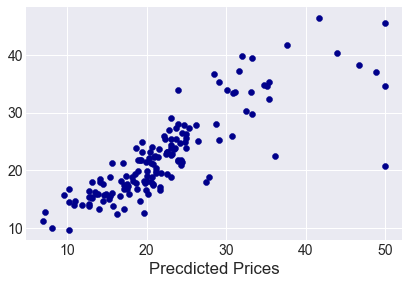

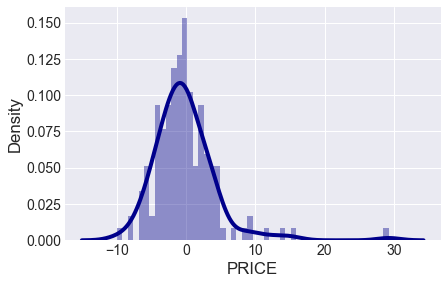

In [30]:
def model3():

    ###  We will convert columns PTRATIO and LSTAT Let's consider only two columns and check how much difference we get in the R2 Score
     
    new_bos['LSTAT'] = new_bos['LSTAT'].apply(np.log)
    
    X = new_bos[['RM','LSTAT']]
    y = new_bos['PRICE']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Let's split the data
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.3,random_state = 42)


    print("Shape of X train:",X_train.shape)
    print("Shape of Y Train:", X_test.shape)
    print("-------------------------------")

    lm = LinearRegression()
    lm.fit(X_train,y_train)

    y_pred = lm.predict(X_test)

    df = pd.DataFrame(data = [y_pred,y_test])
    print(df.T)

    print("-------------------------------")
    print('Mean_Absolute_Error : ' , metrics.mean_absolute_error(y_test,y_pred))
    print('Mean_Squared_Error : ' , metrics.mean_squared_error(y_test,y_pred))
    print('Root_Mean_Squared_Error : ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    print('R2 score is : ', r2_score(y_test,y_pred))
    print("-------------------------------")
    
    ## Let's plot the scaterplot of Precicted and Actual values
    plt.scatter(y_test,y_pred,color= 'darkblue')
    plt.xlabel("Actual Prices")
    plt.xlabel("Precdicted Prices")
    plt.show()
    
    sns.distplot((y_test-y_pred),bins=50,color= 'darkblue')
    
model2()

Variance score: 0.699696678043713


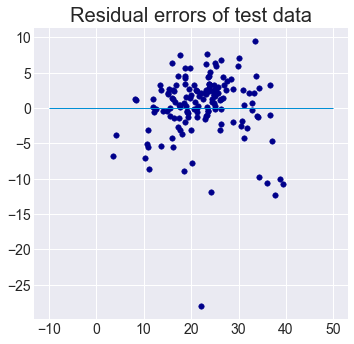

In [31]:
## Let's create a residual function and plot the graph
def residuals3():
    plt.style.use("seaborn-darkgrid")
    plt.figure(figsize=(5,5))
    plt.scatter(lm.predict(X_test),lm.predict(X_test)- y_test,s=30,color='darkblue')
    plt.xlabel('')
    plt.title("Residual errors of test data")
    plt.hlines(0,xmin=-10,xmax=50,lw=1)
       
# The closer to 1,accurate is the prediction

print("Variance score: {}".format(lm.score(X_test,y_test)))

residuals2()

In [32]:
y_pred_data = pd.DataFrame({'Actual Prices':y_test,'Predicted Prices':y_pred,'Difference':y_test-y_pred})
y_pred_data[0:30]

,Actual Prices,Predicted Prices,Difference
467,19.1,13.759607,5.340393
73,23.4,24.321245,-0.921245
232,41.7,37.068850,4.631150
176,23.2,24.942329,-1.742329
238,23.7,27.563478,-3.863478
431,14.1,18.664031,-4.564031
156,13.1,18.729017,-5.629017
55,35.4,31.203262,4.196738
323,18.5,21.013643,-2.513643
9,18.9,21.358207,-2.458207
